In [1]:
#import required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data 
data= pd.read_excel('CHURNDATA.xlsx')

In [3]:
#Data understanding 
data.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [4]:
data.columns

Index(['CIF', 'CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Gender',
       'CUS_Marital_Status', 'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [6]:
#check null values
data.isnull().sum()

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

In [7]:
#handling null values or Imputing null values
data[data['CUS_Gender'].isnull()]

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
184,XXXXXX,Jan 1 1900 12:00AM,119,NaN,NaN,MARRIED,1998-01-20,21,4,4,...,2000.0,0.0,18649.3,9,2000.00,1,10,2223,LOW,CHURN
996,XXXXXX,Jan 1 1900 12:00AM,119,NaN,NaN,SINGLE,1998-01-07,21,27,0,...,0.0,0.0,43318.0,27,39250.86,5,32,2233,LOW,CHURN


<AxesSubplot:xlabel='CUS_Gender', ylabel='count'>

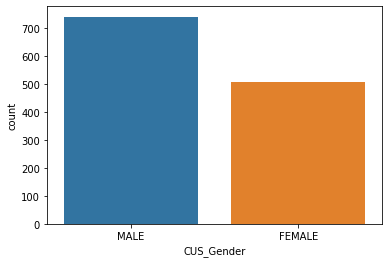

In [8]:
#plot ratioofmen vs female
sns.countplot(data=data, x="CUS_Gender")

In [9]:
#here mens ratio is more so we replace those null value with men as per concept of statistics mode
# Replacing NAN with 'MALE': as MALE having more occurance 
data['CUS_Gender']=data['CUS_Gender'].fillna('MALE')

In [10]:
data['CUS_Gender'].isnull().sum()

0

In [11]:
# Null values in CUS_Month_Income
data[data['CUS_Month_Income'].isnull()]

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
85,XXXXXX,Apr 3 1957 12:00AM,62,NaN,FEMALE,SINGLE,1996-05-07,23,21,17,...,0.00,0.00,82043.30,47,0.00,0,47,2223,LOW,ACTIVE
99,XXXXXX,Dec 31 1953 12:00AM,66,NaN,FEMALE,MARRIED,1998-01-20,21,11,25,...,24294.55,26893.50,101900.00,58,75482.60,32,90,2223,LOW,ACTIVE
184,XXXXXX,Jan 1 1900 12:00AM,119,NaN,MALE,MARRIED,1998-01-20,21,4,4,...,2000.00,0.00,18649.30,9,2000.00,1,10,2223,LOW,CHURN
316,XXXXXX,Jan 2 1975 12:00AM,44,NaN,MALE,SINGLE,2005-05-26,14,0,2,...,0.00,0.00,1000.00,2,0.00,0,2,2222,MIDLE,CHURN
368,XXXXXX,May 7 1976 12:00AM,43,NaN,MALE,SINGLE,2005-06-07,14,22,56,...,125400.78,41800.26,229406.14,101,250801.56,12,113,2222,MIDLE,ACTIVE
400,XXXXXX,Jul 15 1963 12:00AM,56,NaN,MALE,SINGLE,1995-03-17,24,26,20,...,0.00,0.00,297687.54,46,0.00,0,46,2222,MIDLE,CHURN
427,XXXXXX,Dec 7 1963 12:00AM,56,NaN,MALE,SINGLE,1991-11-09,28,9,14,...,18550.72,0.00,26745.00,25,18550.72,1,26,2223,LOW,ACTIVE
857,XXXXXX,Feb 2 1961 12:00AM,58,NaN,FEMALE,SINGLE,1997-01-13,22,37,68,...,80679.78,180922.70,276279.95,152,261602.48,8,160,2223,LOW,ACTIVE
938,XXXXXX,Mar 13 1976 12:00AM,43,NaN,FEMALE,MARRIED,1996-07-25,23,6,6,...,0.00,2900.00,9751.20,21,2900.00,1,22,2222,MIDLE,ACTIVE
996,XXXXXX,Jan 1 1900 12:00AM,119,NaN,MALE,SINGLE,1998-01-07,21,27,0,...,0.00,0.00,43318.00,27,39250.86,5,32,2233,LOW,CHURN


<AxesSubplot:xlabel='CUS_Month_Income', ylabel='count'>

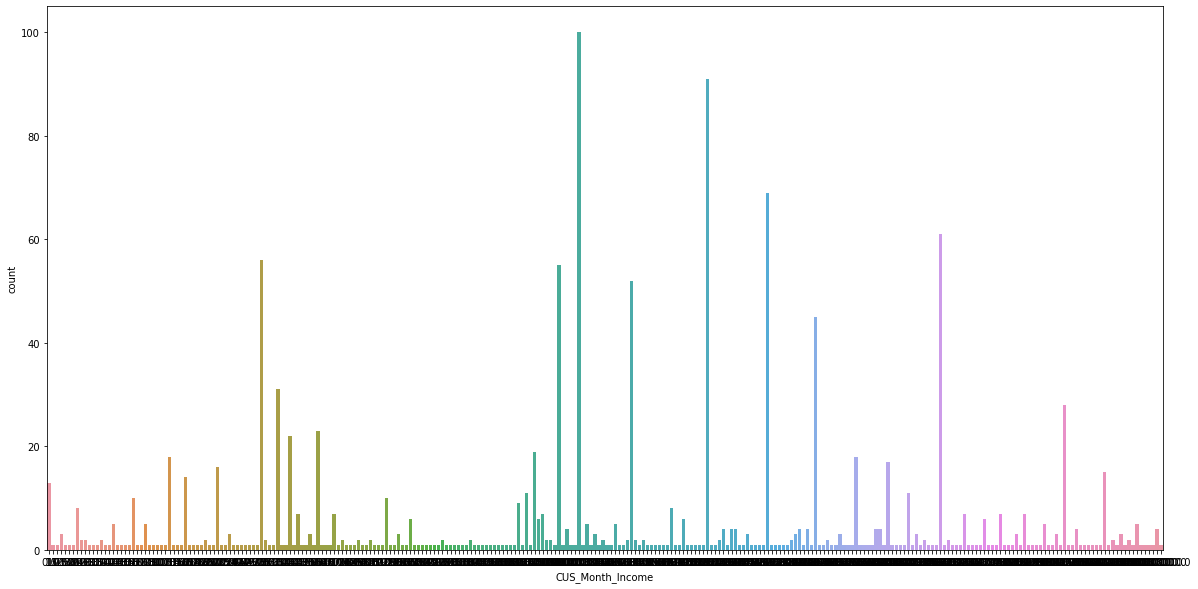

In [12]:
#ploting for understaing null values
plt.figure(figsize=(20,10))
sns.countplot(data=data, x="CUS_Month_Income")

<AxesSubplot:ylabel='CUS_Month_Income'>

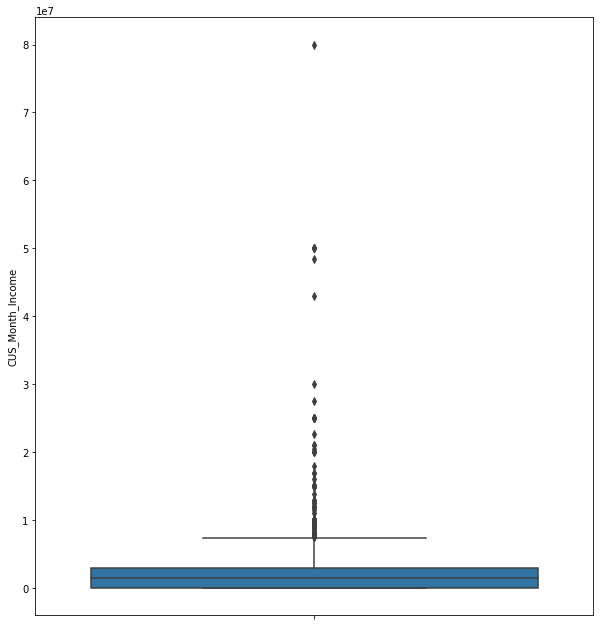

In [13]:
plt.figure(figsize=(10,11))
sns.boxplot(data=data, y='CUS_Month_Income')

In [14]:
print(data['CUS_Month_Income'].describe())
print(data['CUS_Month_Income'].mode())

count    1.238000e+03
mean     2.764869e+06
std      5.406761e+06
min      0.000000e+00
25%      7.568750e+03
50%      1.500000e+06
75%      3.000000e+06
max      8.000000e+07
Name: CUS_Month_Income, dtype: float64
0    1000000.0
Name: CUS_Month_Income, dtype: float64


In [15]:
#here value of mode is too big which is not sutable for our model will replace with 0
#Replacing Nan with min i.e 0 value
data['CUS_Month_Income']=data['CUS_Month_Income'].fillna(0)

In [16]:
data['CUS_Month_Income'].isnull().sum()

0

In [17]:
data=data.dropna()

In [18]:
data.isnull().sum()

CIF                                   0
CUS_DOB                               0
AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
CUS_Customer_Since                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0


In [19]:
#checking for duplicate records
print(f"duplicates: {data.duplicated().sum()}")

duplicates: 0


In [20]:
#Transferoming data to datetime format and extracting year 
#CUS_DOB
data['CUS_DOB']=pd.to_datetime(data['CUS_DOB'])
data['CUS_DOB']=pd.DatetimeIndex(data['CUS_DOB']).year

In [21]:
data['CUS_DOB'].head()

0    1970
1    1973
2    1966
3    2004
4    1971
Name: CUS_DOB, dtype: int64

In [22]:
#'CUS_Customer_Since'
data['CUS_Customer_Since']=pd.to_datetime(data['CUS_Customer_Since'])
data['CUS_Customer_Since']=pd.DatetimeIndex(data['CUS_Customer_Since']).year

In [23]:
data['CUS_Customer_Since'].head()

0    1994
1    2005
2    2005
3    2005
4    2014
Name: CUS_Customer_Since, dtype: int64

### Droping unnecessary columns 

In [24]:
#drop unecessary columns or columns having same meaning
data.drop('CIF', axis=1, inplace=True)

In [25]:
# check columns which are same features date of birth and age will represent same feature 
dfage=2019-data['CUS_DOB']
data[dfage!=data['AGE']]['AGE']

Series([], Name: AGE, dtype: int64)

In [26]:
data.drop('CUS_DOB',axis=1,inplace=True)

In [27]:
#here also getting same meaning for two feature so will drop one of them
df_CCS=2019-data['CUS_Customer_Since']
data[df_CCS!=data['YEARS_WITH_US']]['YEARS_WITH_US']

Series([], Name: YEARS_WITH_US, dtype: int64)

In [28]:
data.drop('CUS_Customer_Since', axis=1,inplace=True)

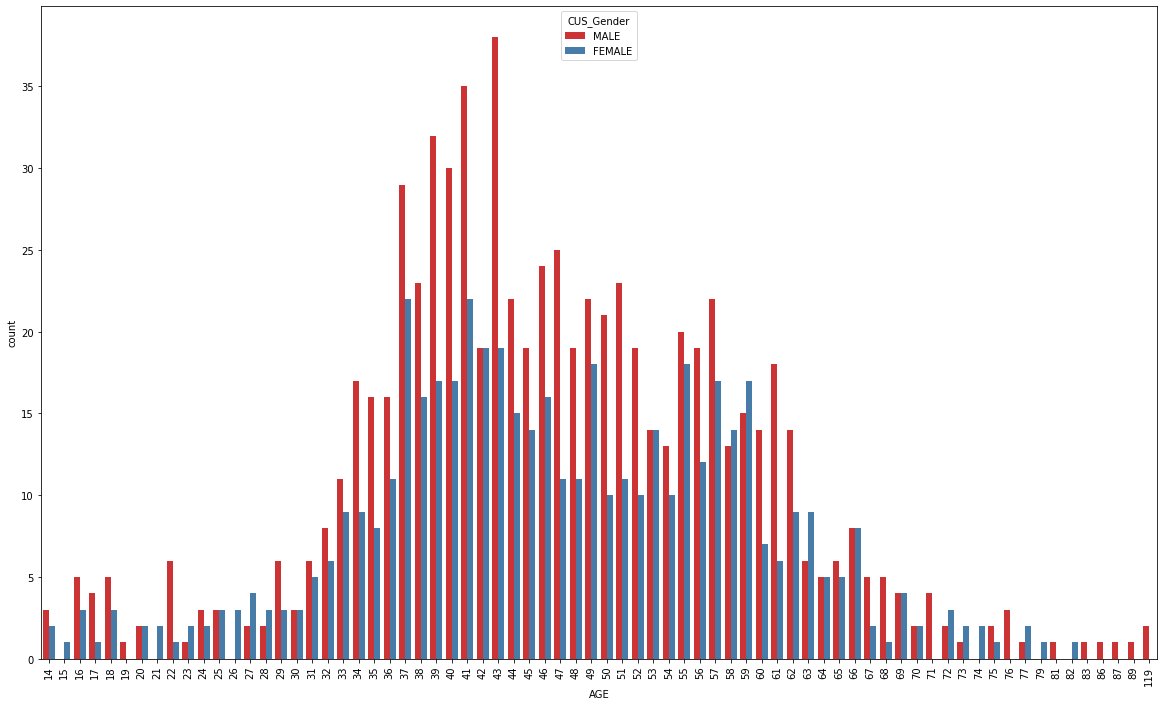

In [29]:
#some plotting to select features want for our model
plt.figure(figsize=(20,12))
chart=sns.countplot(x='AGE', data=data, hue='CUS_Gender',palette='Set1') 
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

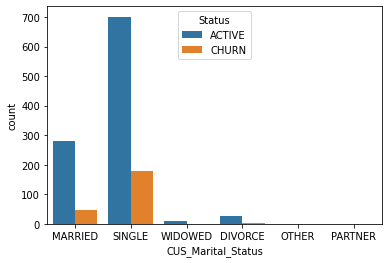

In [30]:
#check w.r.t CUS_Marital_Status
sns.countplot(data=data, x="CUS_Marital_Status", hue="Status")
plt.show()

#### from this visual we can clearly see that churn customers are mostly belongs to married and single status 

<AxesSubplot:xlabel='TAR_Desc', ylabel='YEARS_WITH_US'>

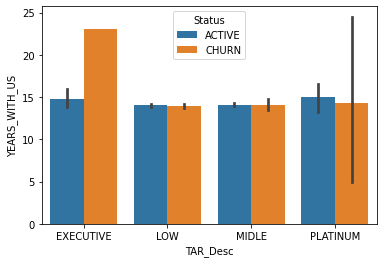

In [31]:
sns.barplot(data=data, x="TAR_Desc", y="YEARS_WITH_US", hue="Status")

<AxesSubplot:xlabel='TAR_Desc', ylabel='count'>

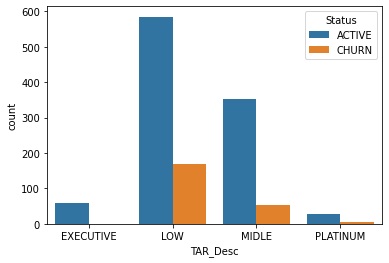

In [32]:
sns.countplot(data=data, x="TAR_Desc", hue="Status")

<AxesSubplot:xlabel='total transactions', ylabel='total debit transactions'>

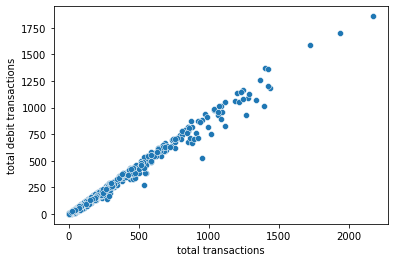

In [33]:
sns.scatterplot(data=data, x="total transactions", y="total debit transactions")

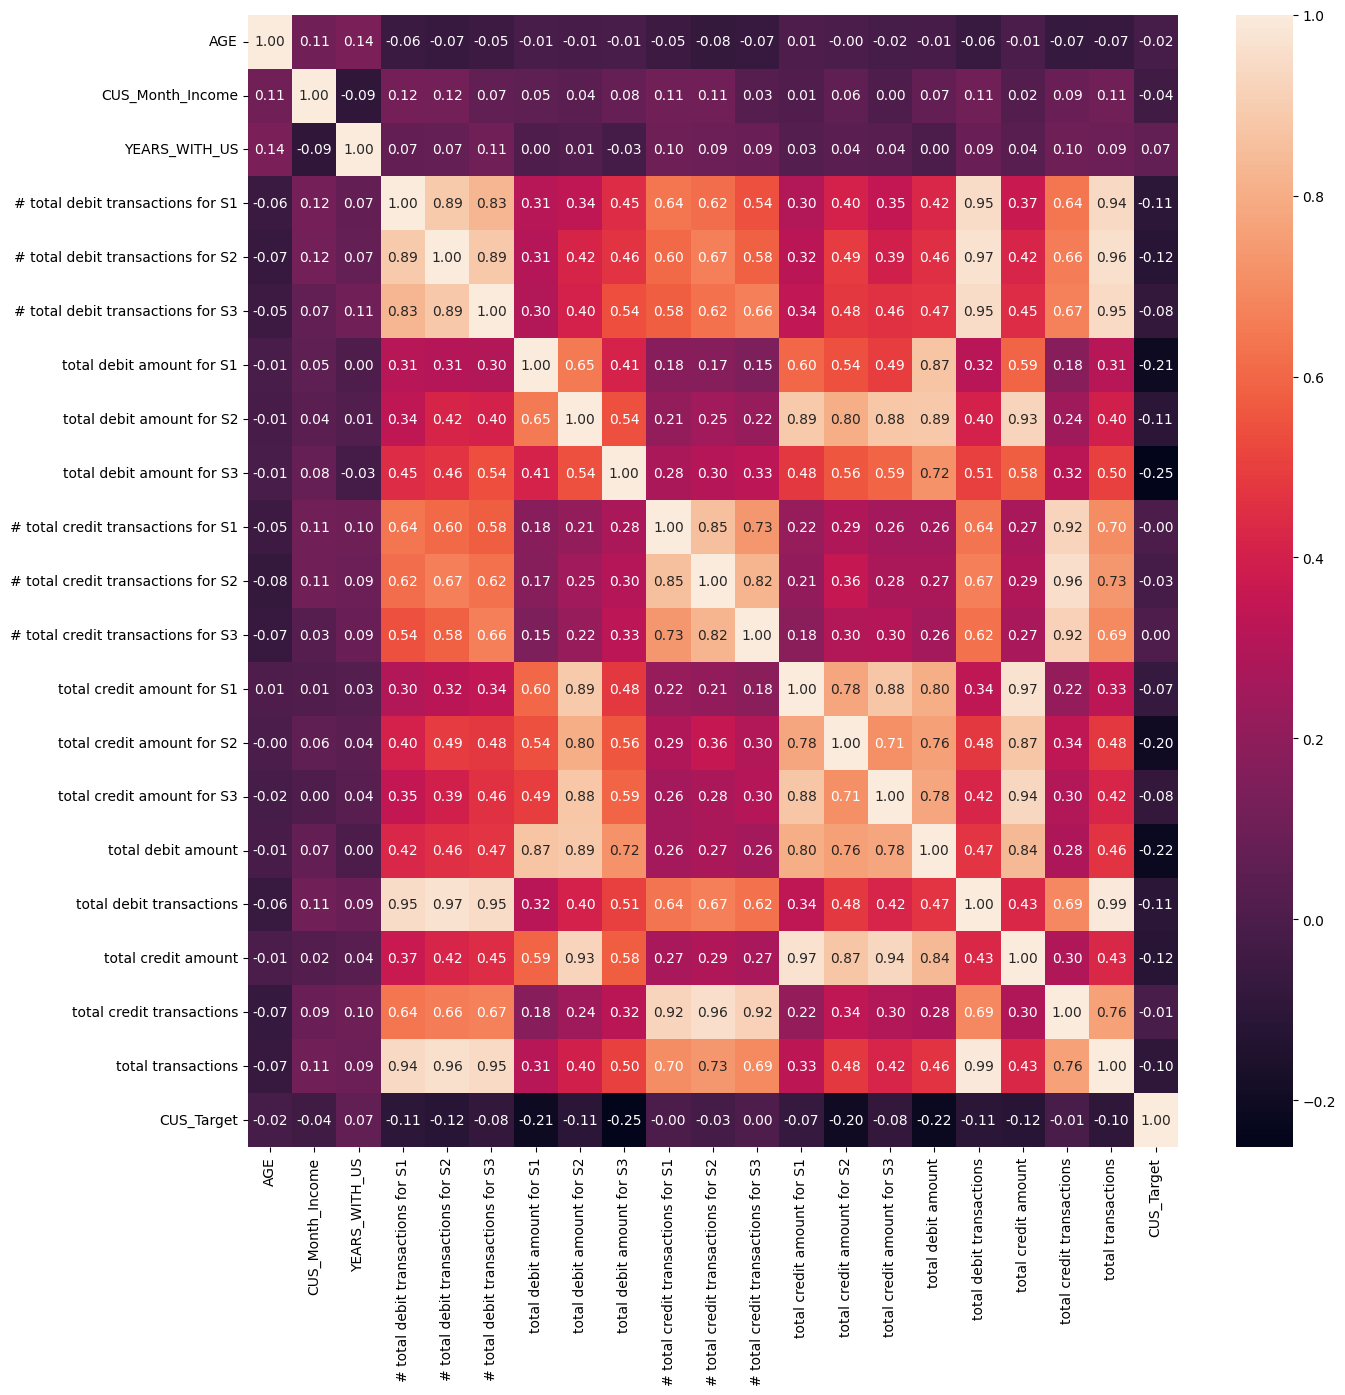

In [34]:
#plot heatmap 
plt.figure(figsize=(15,15), dpi=100)
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [35]:
#dropping features and selecting features which are required
data.drop(data.columns[5:17], axis=1, inplace=True)
data.drop(['total credit transactions','total debit transactions'], axis=1,inplace=True)

In [36]:
data.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total credit amount,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,4758311.63,5659653.33,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,139363.22,87000.00,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,37375.46,1020883.70,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,4000.00,76946.96,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,338470.29,442100.00,81,2223,LOW,ACTIVE


###  Label encoding

In [37]:
#Status
data['Status'].unique()
data['Status']=pd.to_numeric(data['Status'].replace(['ACTIVE', 'CHURN'],[0,1]))
data['Status'].dtype

dtype('int64')

In [38]:
data['Status'].unique()

array([0, 1], dtype=int64)

In [39]:
#Gender
data['CUS_Gender'].unique()
data['CUS_Gender']=pd.to_numeric(data['CUS_Gender'].replace(['FEMALE', 'MALE'],[0,1]))
data['Status'].dtype

dtype('int64')

In [40]:
data['CUS_Gender'].unique()

array([1, 0], dtype=int64)

In [41]:
data['CUS_Marital_Status'].unique()
data['CUS_Marital_Status']=pd.to_numeric(data['CUS_Marital_Status'].replace(['MARRIED', 'SINGLE', 'WIDOWED', 'DIVORCE', 'OTHER', 'PARTNER'],
                                                                            [0,1,2,3,4,5]))
data['CUS_Marital_Status'].dtype

dtype('int64')

In [42]:
data['CUS_Marital_Status'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [43]:
data['TAR_Desc'].unique()
data['TAR_Desc']=pd.to_numeric(data['TAR_Desc'].replace(['EXECUTIVE', 'LOW', 'MIDLE', 'PLATINUM'],[0,1,2,3]))
data['TAR_Desc'].dtype

dtype('int64')

In [44]:
data['TAR_Desc'].unique()

array([0, 1, 2, 3], dtype=int64)

In [45]:
data.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total credit amount,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,1,0,25,4758311.63,5659653.33,952,2231,0,0
1,46,1500000.00,0,1,14,139363.22,87000.00,107,2223,1,0
2,53,5000000.00,0,1,14,37375.46,1020883.70,80,2222,2,0
3,15,500.00,0,1,14,4000.00,76946.96,13,2223,1,0
4,48,9000000.00,0,1,5,338470.29,442100.00,81,2223,1,0


In [46]:
data['Status'].value_counts()

0    1022
1     227
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

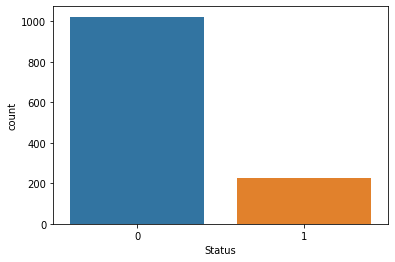

In [47]:
sns.countplot(data=data, x="Status")

In [48]:
#As our dataset is imbalanced so will handle w.r.t. smote

In [49]:
#Output & Input Parameters
x = data.drop('Status',axis=1)
x

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total credit amount,total transactions,CUS_Target,TAR_Desc
0,49,7116.64,1,0,25,4758311.63,5659653.33,952,2231,0
1,46,1500000.00,0,1,14,139363.22,87000.00,107,2223,1
2,53,5000000.00,0,1,14,37375.46,1020883.70,80,2222,2
3,15,500.00,0,1,14,4000.00,76946.96,13,2223,1
4,48,9000000.00,0,1,5,338470.29,442100.00,81,2223,1
...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,1,1,14,5645.60,0.00,26,2223,1
1245,35,3500000.00,1,1,14,385735.90,674630.41,149,2222,2
1246,34,1000.00,1,1,14,2473621.68,2641348.01,1424,2232,2
1247,69,2000000.00,1,1,14,1371852.22,1310768.35,631,2222,2


In [50]:
y = data['Status']
y

0       0
1       0
2       0
3       0
4       0
       ..
1244    1
1245    0
1246    0
1247    0
1248    0
Name: Status, Length: 1249, dtype: int64

### Handle imbalaced data using SMOTE

In [74]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [75]:
sm = SMOTE(random_state=20)

In [76]:
x_res,y_res = sm.fit_resample(x,y)

In [77]:
from collections import Counter
print(sorted(Counter(y_res).items()),y_res.shape)

[(0, 1022), (1, 1022)] (2044,)


In [78]:
#splitting the dataset into train and test set 
#after oversampling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.2,random_state=42)

### split dataset for imbalanced dataset

In [56]:
#splitting the dataset into train and test set
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42,stratify=y)
#here we use random state and stratify becasue of imbalaced datset

### Feature scalling 

In [57]:
#to find the distance used the feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [58]:
x_train = sc.fit_transform(x_train)
x_test =  sc.fit_transform(x_test)

In [59]:
x_train

array([[-0.79993722, -0.49585116,  0.81038042, ...,  0.85684811,
         0.19712105, -0.53236159],
       [-0.14153369, -0.49595108, -1.23398836, ...,  0.88937786,
        -0.09767525,  1.11928198],
       [ 1.58677556, -0.18539955, -1.23398836, ..., -0.25277756,
         0.19712105, -0.53236159],
       ...,
       [-0.47073545, -0.40973923,  0.81038042, ..., -0.68650746,
         0.19712105, -0.53236159],
       [-0.22383413,  1.07641799,  0.81038042, ...,  0.13757936,
        -0.09767525,  1.11928198],
       [ 0.92837204, -0.15088575, -1.23398836, ...,  0.07613429,
         0.19712105, -0.53236159]])

### LogisticRegression  

In [79]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [80]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_pred = logistic.predict(x_test)

### before Balacing the dataset results 

In [63]:
#before smote result
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
#As our dataset is imbalanced so only depends on accuracy is dangerous so calulated confusion matix also.

0.82
0.4
0.5
0.4444444444444445


### After balancing the dataset result 

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.7432762836185819
0.9476190476190476
0.6791808873720137
0.7912524850894633


### Randomforest classifier 

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
y_pred1 = rf.predict(x_test)

### before Balacing the dataset results  

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
print(accuracy_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.8
0.5555555555555556
0.45454545454545453
0.5


### After balancing the dataset result 

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
print(accuracy_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.8704156479217604
0.919047619047619
0.8427947598253275
0.8792710706150342


### DecisionTree Classifier 

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
y_pred2 = dt.predict(x_test)

### Before balancing the dataset result

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
print(accuracy_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.74
0.4666666666666667
0.3387096774193548
0.39252336448598124


### After balancing the dataset result 

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
print(accuracy_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.8141809290953546
0.8333333333333334
0.8101851851851852
0.8215962441314554


### So from above algorithms we get best result from Randomforest Classifier 

In [90]:
import pickle
pickle_out = open("rf.pkl", "wb")
pickle.dump(rf, pickle_out)
pickle_out.close()


### from above analaysis we get to know random forest classifier gives more accurate result 